<a href="https://colab.research.google.com/github/Allekarthik/AIML_Projects_and_labs/blob/main/AIML_III_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

---

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [40]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart.csv


In [41]:
data = pd.read_csv("heart.csv")
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [42]:
data.shape

(303, 14)

In [43]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [44]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [45]:
data.head()

age     sex                cp  trestbps  chol  fbs  restecg  thalach exang  \
0   63    Male  non-anginal pain       145   233    1        0      150    No   
1   37    Male   atypical_angina       130   250    0        1      187    No   
2   41  Female    typical_angina       130   204    0        0      172    No   
3   56    Male    typical_angina       120   236    0        1      178    No   
4   57  Female                 0       120   354    0        1      163   Yes   

   oldpeak             slope  ca               thal   target  
0      2.3  non-anginal pain   0       fixed_defect  Disease  
1      3.5   atypical_angina   0  reversable_defect  Disease  
2      1.4    typical_angina   0  reversable_defect  Disease  
3      0.8    typical_angina   0  reversable_defect  Disease  
4      0.6                 0   0  reversable_defect  Disease

First, lets look at the difference in the number of samples with and without disease using a barplot.

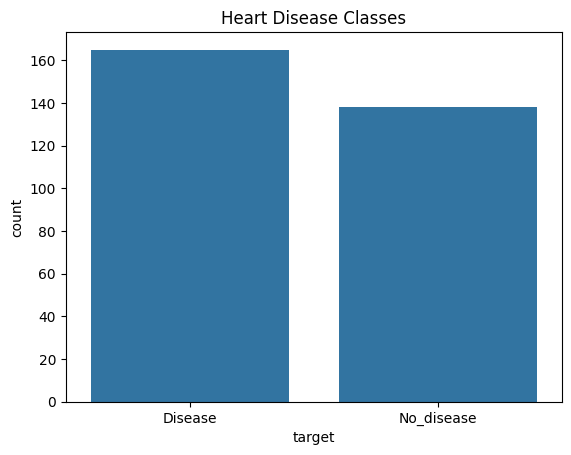

In [46]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

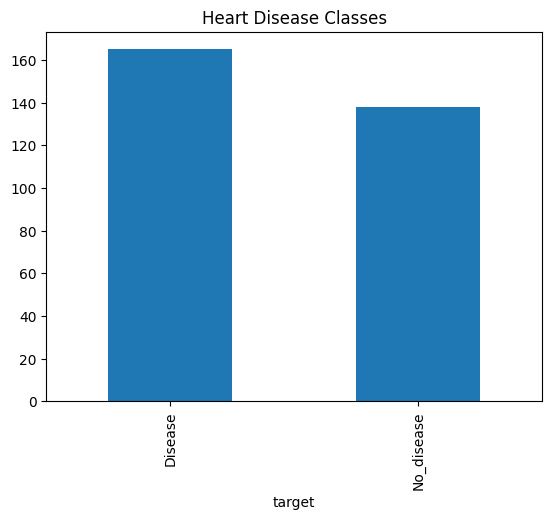

In [47]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

Text(0.5, 1.0, 'Sex')

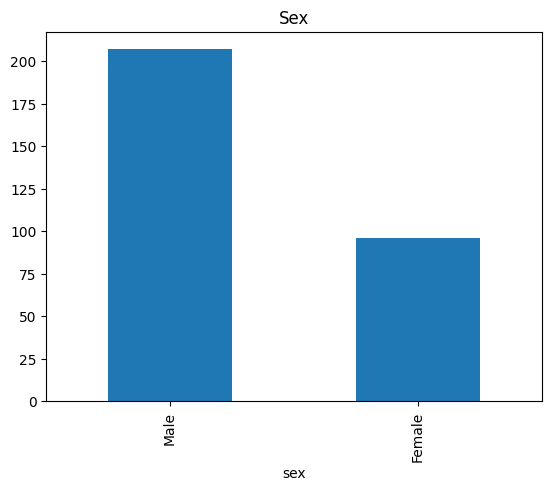

In [48]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do
data['sex'].value_counts().plot(kind='bar').set_title('Sex')


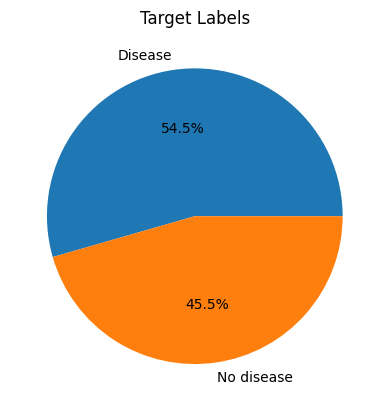

In [49]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

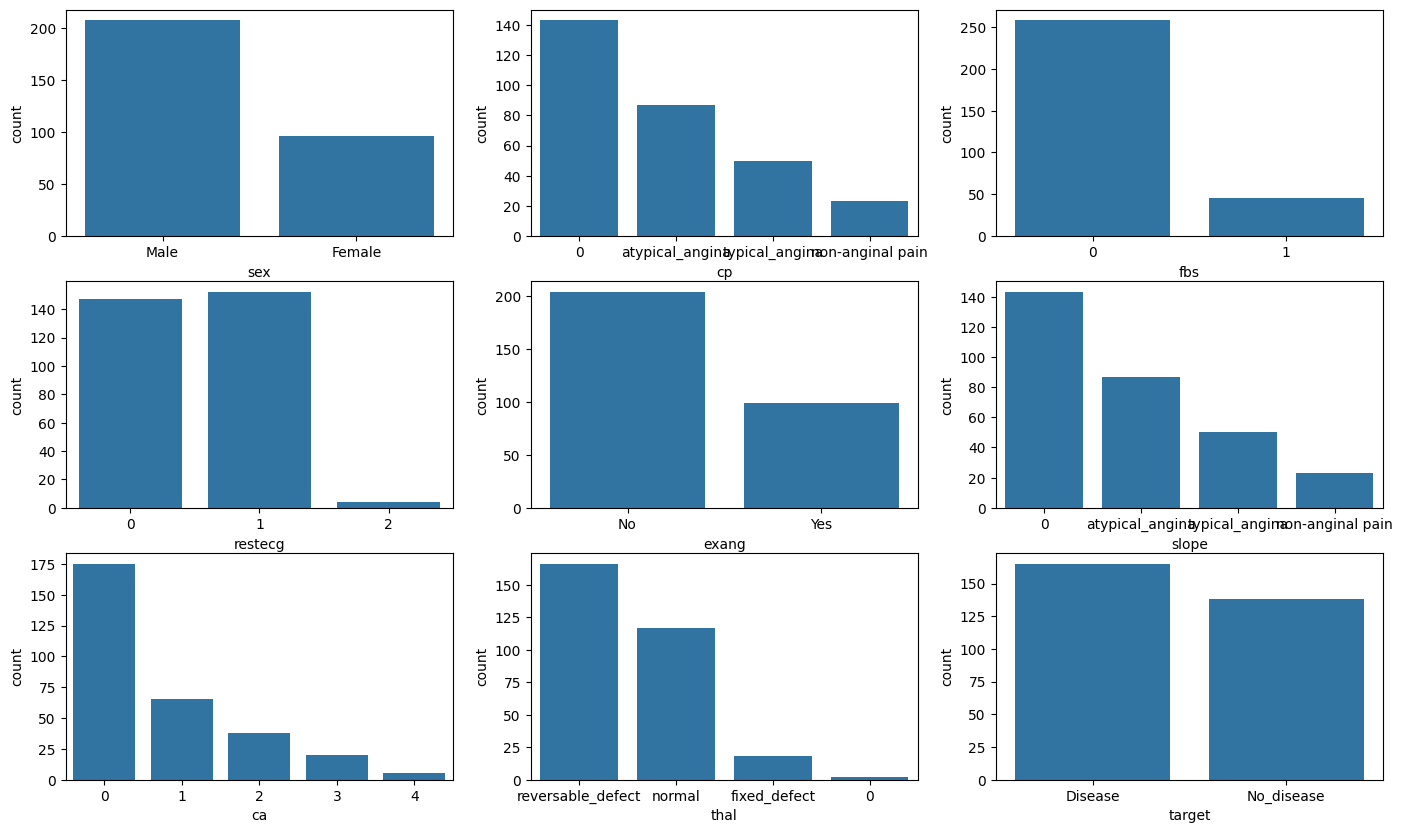

In [50]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal','target']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

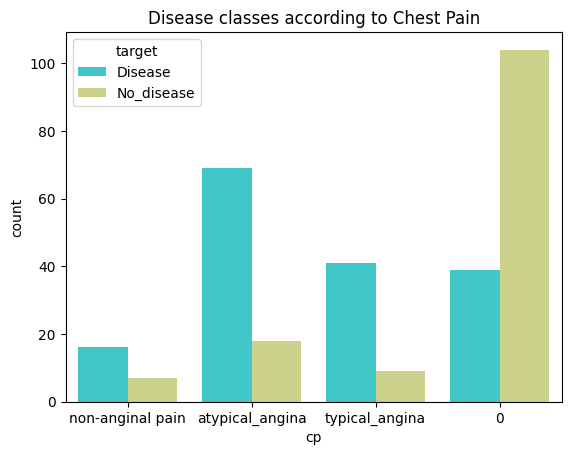

In [51]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

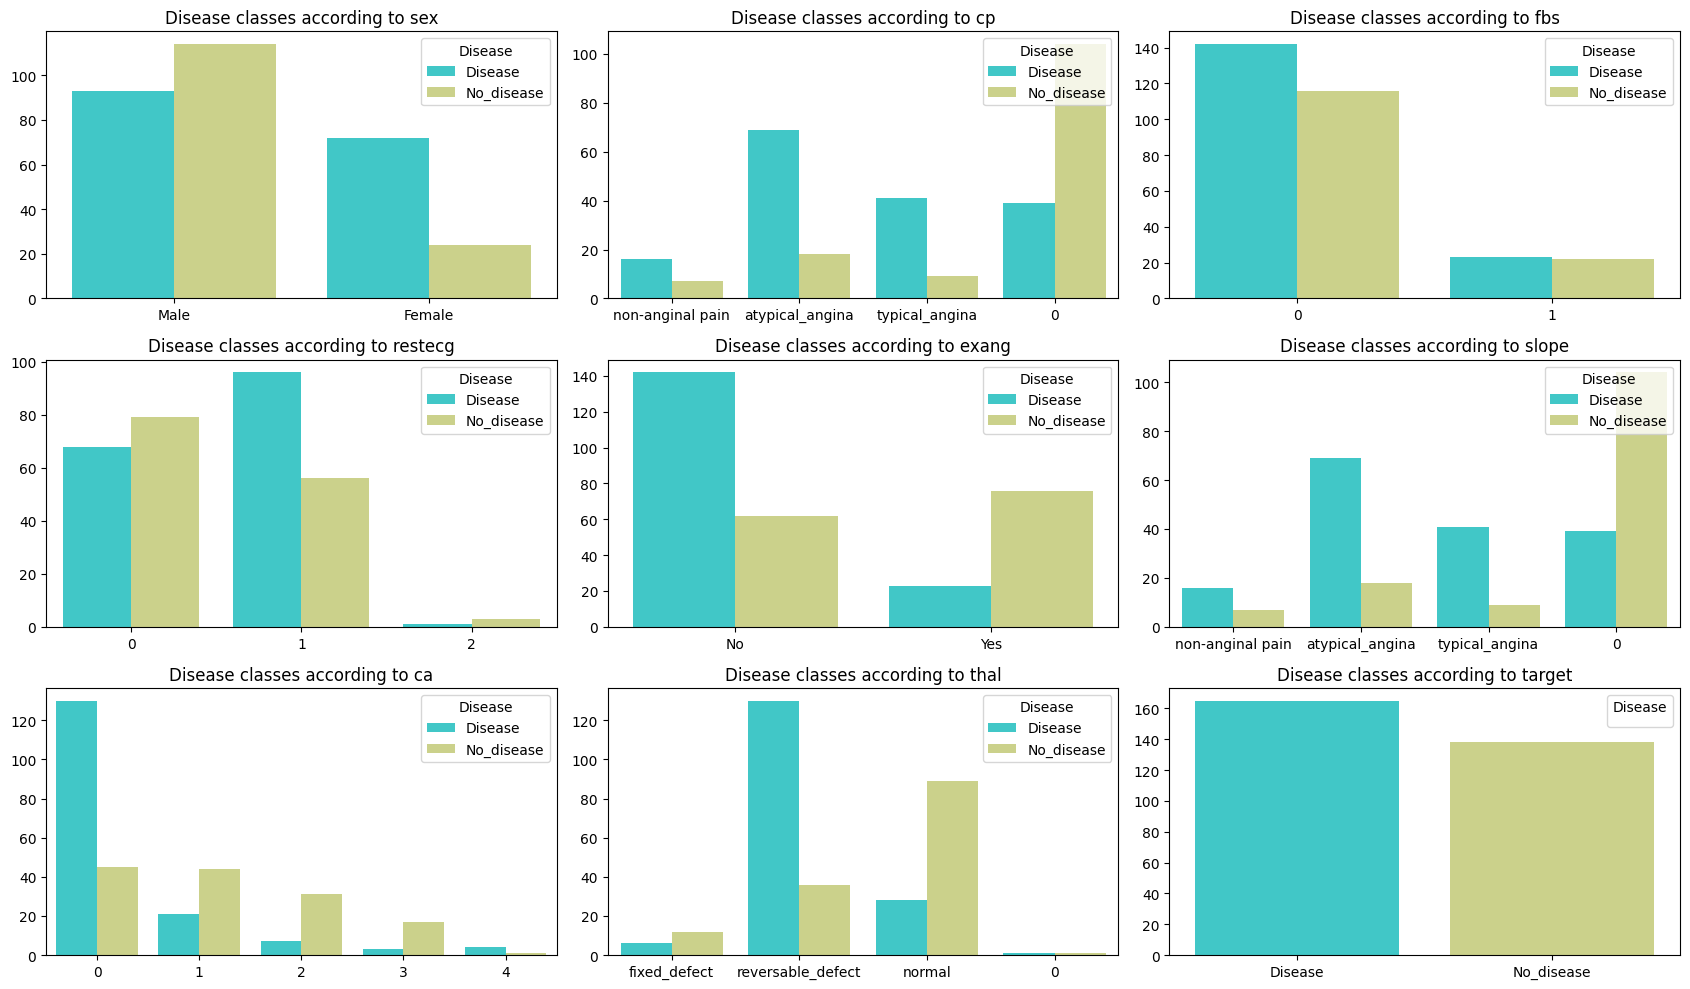

In [52]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal','target']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.countplot(x=feature, hue='target', data=data, ax=ax, palette='rainbow')
    ax.set_title(f'Disease classes according to {feature}')
    ax.legend(title='Disease', loc='upper right')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()











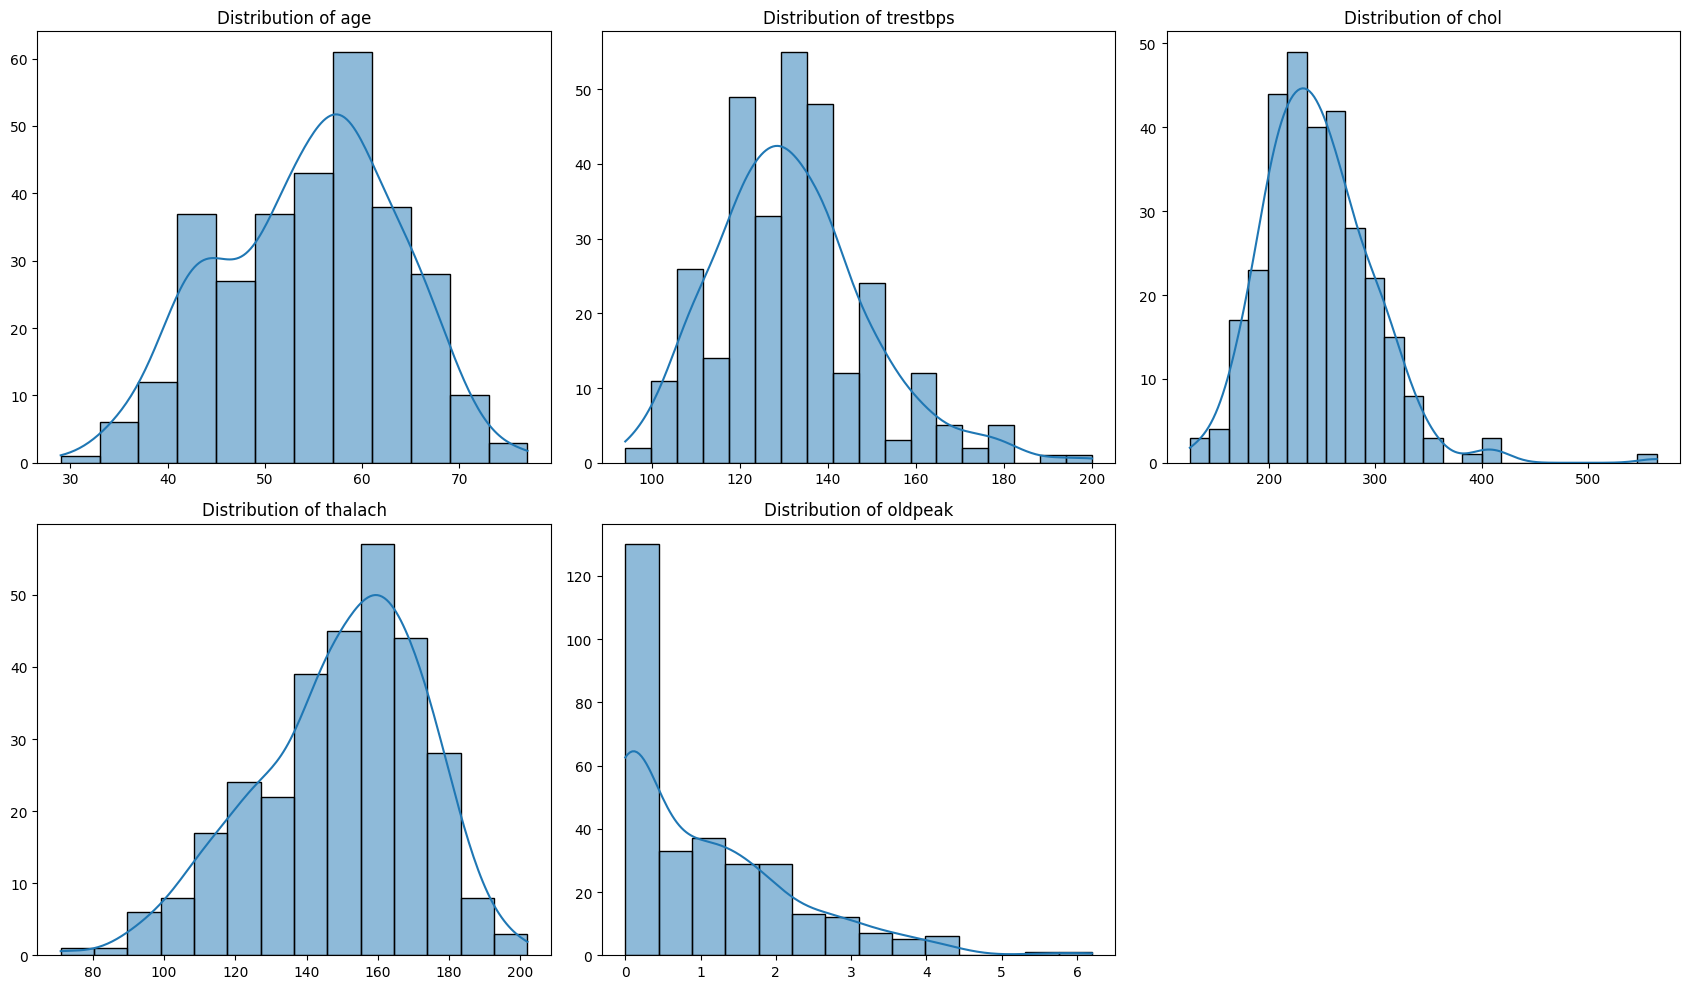

In [53]:
 # Visualising the distribution of the continous variables

# Visualising the distribution of the continous variables
cont_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17, 10))

for idx, feature in enumerate(cont_feat):
    ax = axes[int(idx/3), idx%3]
    sns.histplot(data[feature], ax=ax, kde=True)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remove the empty subplot
fig.delaxes(axes[1,2])

plt.tight_layout()
plt.show()


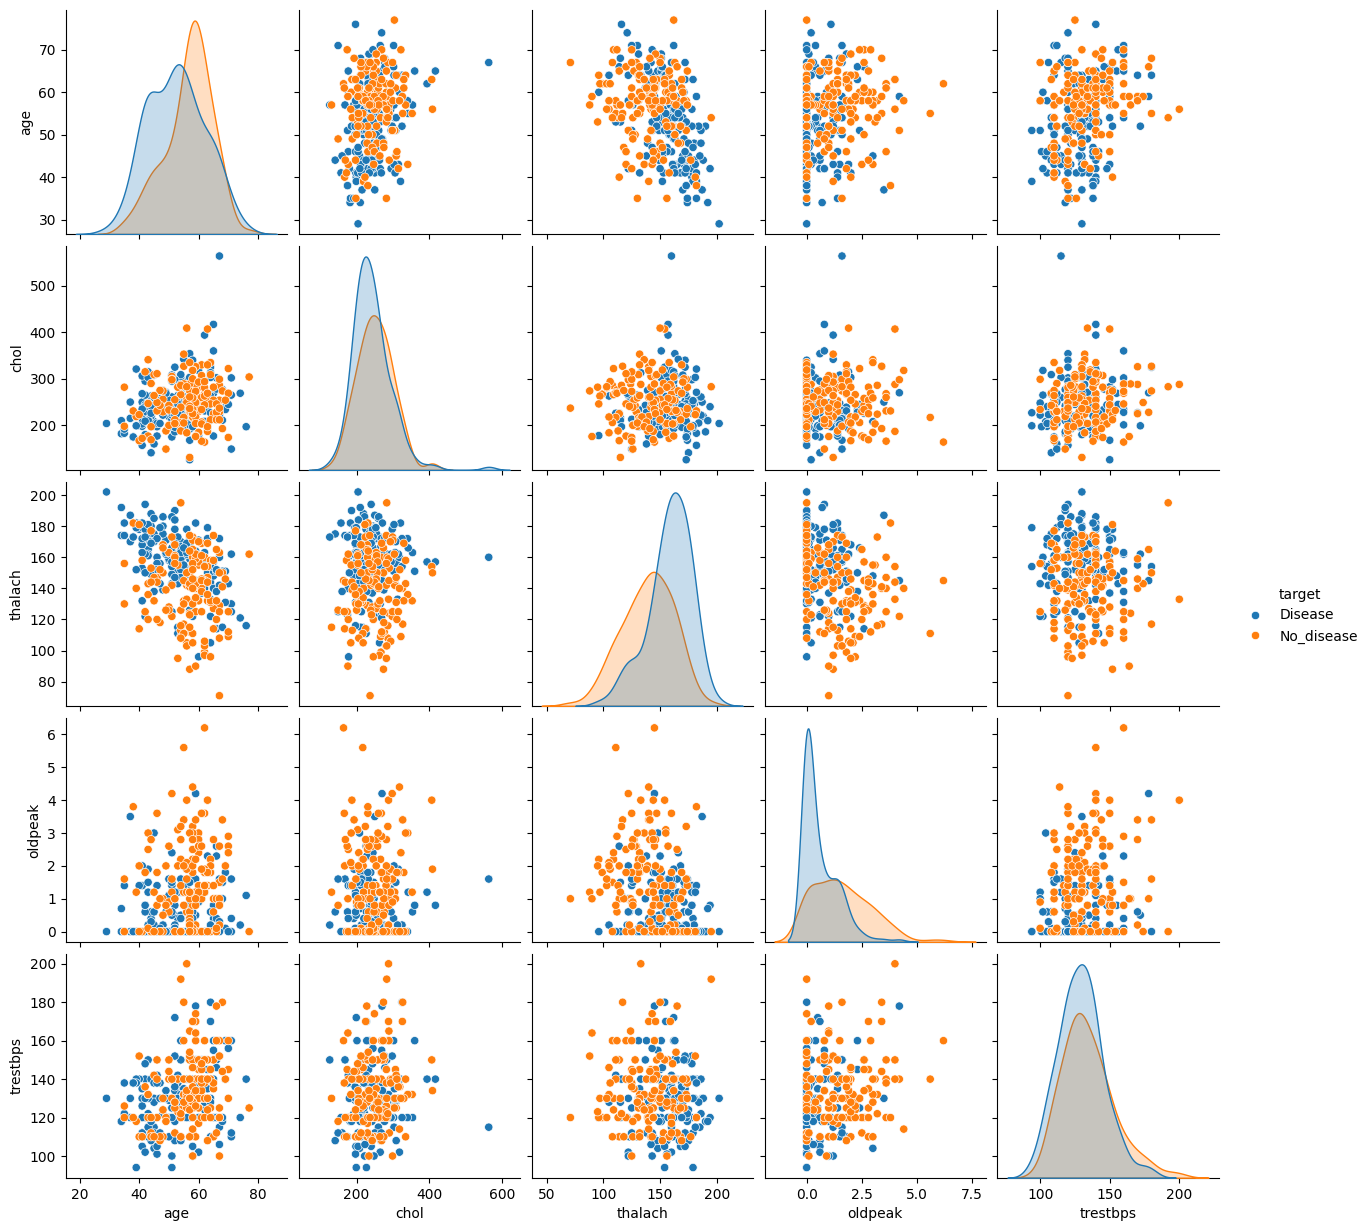

In [54]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

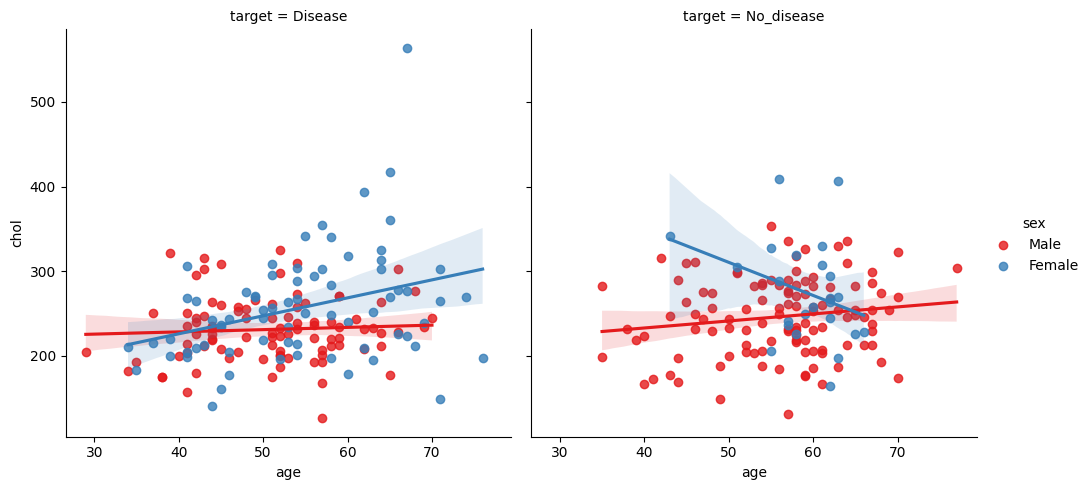

In [55]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

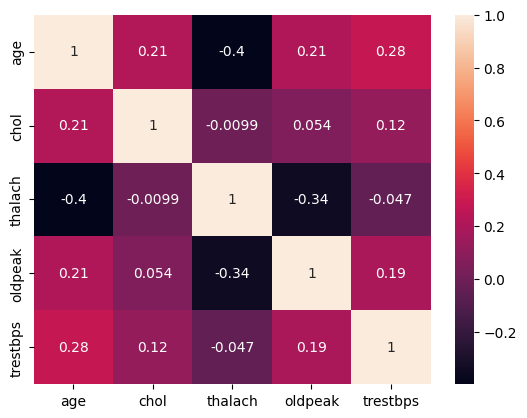

In [56]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

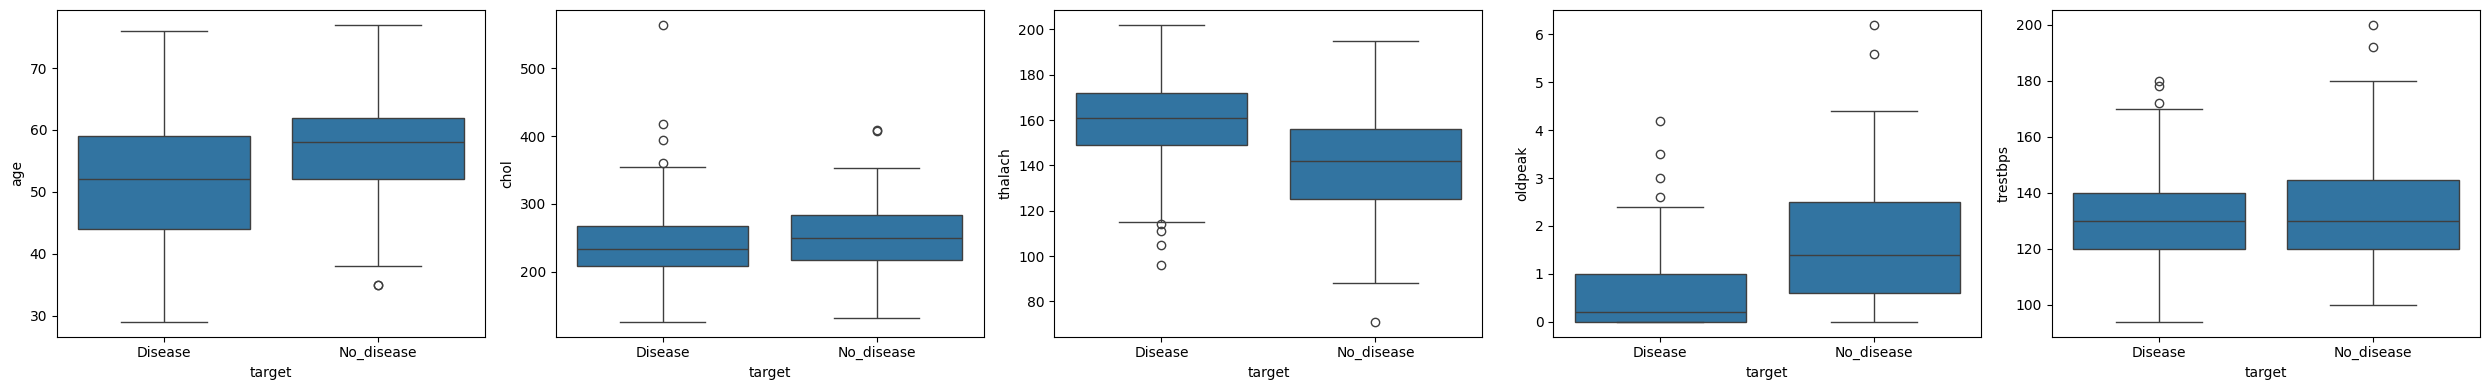

In [57]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

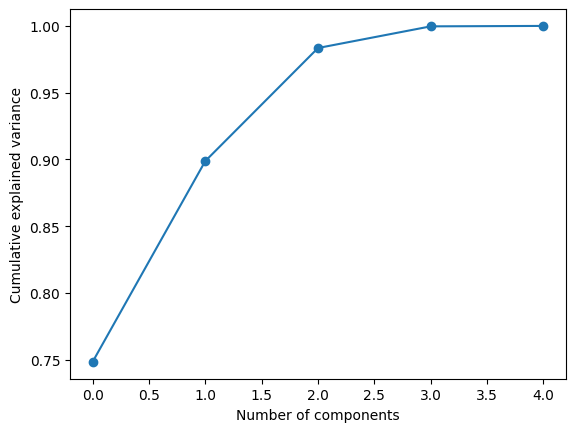

Optimal number of principal components to explain at least 90% variance: 3


In [58]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

optimal_components = next(i for i, cumulative in enumerate(cumulative_variance) if cumulative >= 0.90) + 1
print(f"Optimal number of principal components to explain at least 90% variance: {optimal_components}")




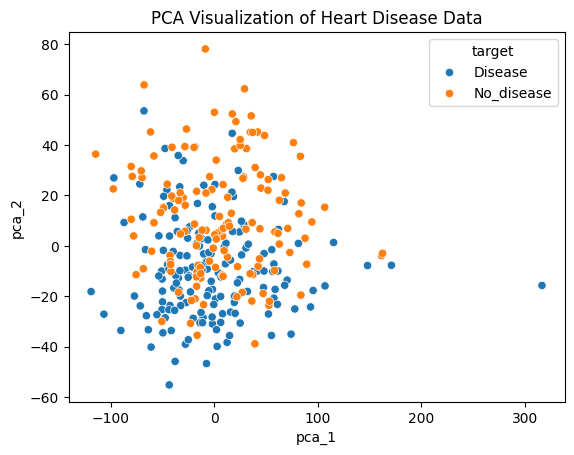

In [59]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


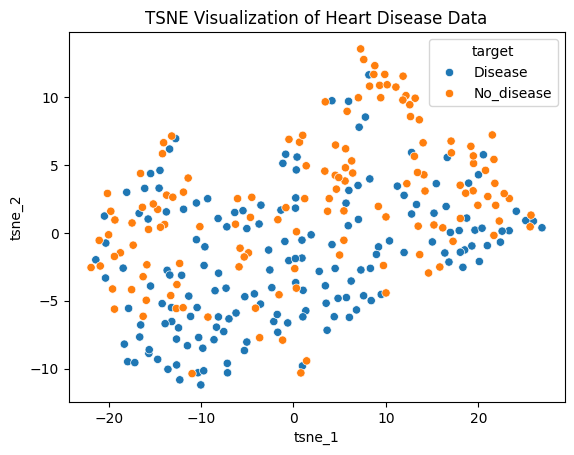

In [60]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

In [62]:
# What is the percentage of Samples with Disease?
import pandas as pd

# Load the dataset
from google.colab import files
uploaded1 = files.upload()
df = pd.read_csv('heart.csv')

# Calculate the percentage of samples with disease
disease_column = 'target'  # Replace with the actual name of your target column
total_samples = len(df)
disease_samples = df[disease_column].sum()  # Assuming 1 indicates presence of disease
percentage_disease = (disease_samples / total_samples) * 100

print(f"Percentage of samples with disease: {percentage_disease:.2f}%")



Saving heart.csv to heart (1).csv
Percentage of samples with disease: 54.46%


In [63]:
# what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?

import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
# df = pd.read_csv('heart.csv')

# Identify continuous features (example feature names; replace with actual feature names)
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  # Update this list based on your dataset

# Separate the data into two groups: with disease and without disease
disease_column = 'target'  # Replace with the actual name of your target column
with_disease = df[df[disease_column] == 1]
without_disease = df[df[disease_column] == 0]

# Perform t-tests and store p-values
p_values = {}
for feature in continuous_features:
    t_stat, p_value = ttest_ind(with_disease[feature], without_disease[feature])
    p_values[feature] = p_value

# Sort features by p-value
sorted_p_values = sorted(p_values.items(), key=lambda item: item[1])

# Print the three features with the most significant differences
print("Top 3 continuous features with significant statistical differences:")
for feature, p_value in sorted_p_values[:3]:
    print(f"{feature}: p-value = {p_value:.6f}")


Top 3 continuous features with significant statistical differences:
oldpeak: p-value = 0.000000
thalach: p-value = 0.000000
age: p-value = 0.000075


What is the optimal number of principal components in our case?
ans: 3

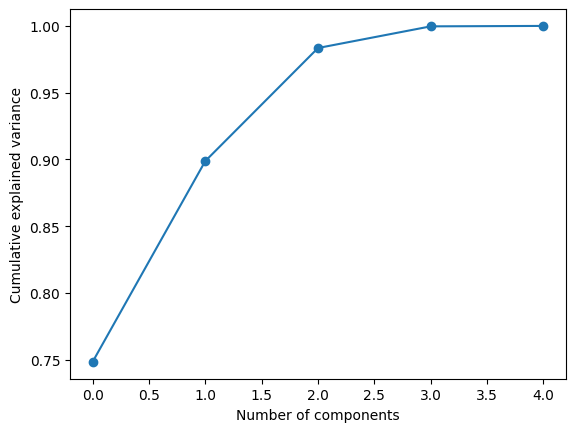

Optimal number of principal components to explain at least 90% variance: 3


In [64]:
# What is the optimal number of principal components in our case?
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

optimal_components = next(i for i, cumulative in enumerate(cumulative_variance) if cumulative >= 0.90) + 1
print(f"Optimal number of principal components to explain at least 90% variance: {optimal_components}")




In [65]:
# 5  what are the continous features with the highest correation with each other?

continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  # Update this list based on your dataset

# Compute the correlation matrix for the continuous features
correlation_matrix = df[continuous_features].corr()

# Find the pairs of features with the highest correlation
# Set the diagonal to NaN to ignore self-correlation
correlation_matrix = correlation_matrix.where(~np.tril(np.ones(correlation_matrix.shape)).astype(bool))

# Unstack the correlation matrix to get a Series of (feature1, feature2) tuples and their correlation values
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)

# Get the most correlated pairs
most_correlated = correlation_pairs[correlation_pairs < 1].head(5)  # Exclude self-correlation and take the top 10 pairs

print("Top 10 pairs of features with the highest correlation:")
print(most_correlated)

Top 10 pairs of features with the highest correlation:
trestbps  age         0.279351
chol      age         0.213678
oldpeak   age         0.210013
          trestbps    0.193216
chol      trestbps    0.123174
dtype: float64


Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?

yes we can see clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots ,but according to my view tsne gives more clear representation from pca in tsne the points are clearly sepaerated .

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [3]:
from google.colab import files
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [4]:
data = pd.read_csv("star_nutri_expanded.csv")

In [5]:
data.head()

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0           0.1            0.0                0.0            0   
1           0.1            0.0                0.0            0   
2           0.1            0.0                0.0            0   
3           0.1            0.0                0.0            0   
4           0.1            0.1                0.0            5   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                        5                 0                  0           0   
1                       10                 0                  0           0   
2                       10                 0                  0           0   
3                       10                 0                  0           0   
4                       75                10                  0           9   

   Protein (g) Vitamin A (% DV) Vitamin C (% DV) Calcium (% DV) Iron (% DV)  \
0          0.3               0%               0%             0%          0%   
1          0.5               0%               0%             0%          0%   
2          1.0               0%               0%             0%          0%   
3          1.0               0%               0%             2%          0%   
4          6.0              10%               0%            20%          0%   

  Caffeine (mg)  
0           175  
1           260  
2           330  
3           410  
4            75

cleaning and filling the missing values in the data

In [6]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [7]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [8]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [10]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [11]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [12]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [13]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [14]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [15]:

data = data.replace({True: 1, False: 0})


In [16]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

In [17]:
data.head()

Calories  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0       3.0            0.1            0.0                0.0          0.0   
1       4.0            0.1            0.0                0.0          0.0   
2       5.0            0.1            0.0                0.0          0.0   
3       5.0            0.1            0.0                0.0          0.0   
4      70.0            0.1            0.1                0.0          5.0   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                      5.0               0.0                0.0         0.0   
1                     10.0               0.0                0.0         0.0   
2                     10.0               0.0                0.0         0.0   
3                     10.0               0.0                0.0         0.0   
4                     75.0              10.0                0.0         9.0   

   Protein (g)  ...  bevp_Grande Nonfat Milk  bevp_Short  \
0          0.3  ...                      0.0         1.0   
1          0.5  ...                      0.0         0.0   
2          1.0  ...                      0.0         0.0   
3          1.0  ...                      0.0         0.0   
4          6.0  ...                      0.0         0.0   

   bevp_Short Nonfat Milk  bevp_Solo  bevp_Soymilk  bevp_Tall  \
0                     0.0        0.0           0.0        0.0   
1                     0.0        0.0           0.0        1.0   
2                     0.0        0.0           0.0        0.0   
3                     0.0        0.0           0.0        0.0   
4                     1.0        0.0           0.0        0.0   

   bevp_Tall Nonfat Milk  bevp_Venti  bevp_Venti Nonfat Milk  bevp_Whole Milk  
0                    0.0         0.0                     0.0              0.0  
1                    0.0         0.0                     0.0              0.0  
2                    0.0         0.0                     0.0              0.0  
3                    0.0         1.0                     0.0              0.0  
4                    0.0         0.0                     0.0              0.0  

[5 rows x 62 columns]

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

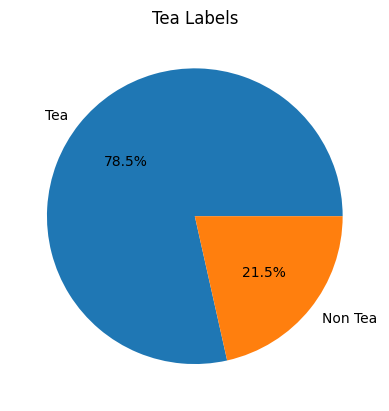

observations
There are more perfernce is given to tea i.e 78.5% i.e more nutritional content, such as calories, fat, protein, and more.
calories:Tea-based items have fewer calories compared to non-tea items.
Fat: Non-tea items may have higher fat content compared to tea items.
Sugar: Tea-based items may have less sugar compared to non-tea items.
Protein and Carbohydrates: Non-tea items might have higher protein and carbohydrate content compared to tea-based items.
Non tea is only 21.5%


In [33]:
## to do


# Create a pie chart of the 'Tea' column also write your observation form the plot
plt.pie(data['Tea'].value_counts(), labels=["Tea", "Non Tea"], autopct='%1.1f%%')
plt.title('Tea Labels')
plt.show()
print("observations")
print("There are more perfernce is given to tea i.e 78.5% i.e more nutritional content, such as calories, fat, protein, and more.")

print("calories:Tea-based items have fewer calories compared to non-tea items.")

print("Fat: Non-tea items may have higher fat content compared to tea items.")

print("Sugar: Tea-based items may have less sugar compared to non-tea items.")

print("Protein and Carbohydrates: Non-tea items might have higher protein and carbohydrate content compared to tea-based items.")

print("Non tea is only 21.5%")






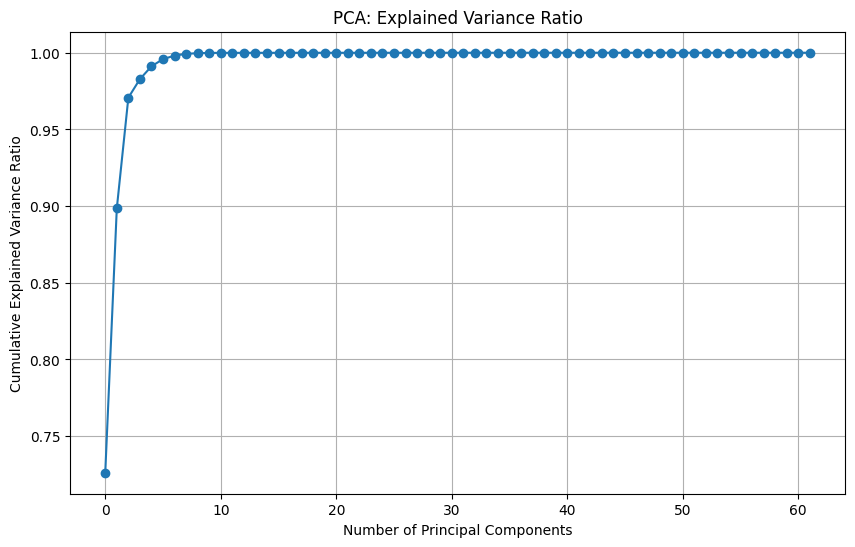

Optimal number of components for 95% variance: 3
Optimal number of components for 99% variance: 5


In [20]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?
numeric_columns = data.select_dtypes(include=["int64", "float64"])
pca = PCA()
pca.fit(numeric_columns)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Explained Variance Ratio')
plt.grid(True)
plt.show()
# Determine the optimal number of components for 95% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Determine the optimal number of components for 99% variance
optimal_components_99 = np.argmax(cumulative_variance >= 0.99) + 1

print(f"Optimal number of components for 95% variance: {optimal_components_95}")
print(f"Optimal number of components for 99% variance: {optimal_components_99}")





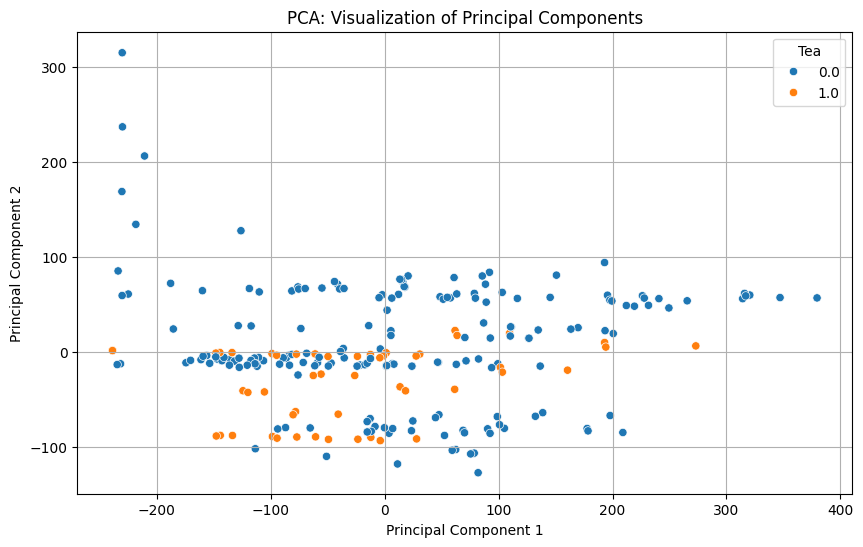

Observations :
- There might be some separation between tea and non-tea drinks along the principal components.
- However, the separation is not very clear, indicating that other factors beyond 'Tea' might contribute to the variance in the data.
- Further analysis, such as examining the loadings of each principal component, could reveal which features are most influential in driving the separation.


In [35]:
##to do
#  visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
# Perform PCA and plot explained variance ratio
numeric_columns = data.select_dtypes(include=["int64", "float64"])

n_components = optimal_components_95
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(numeric_columns)


pca_df = pd.DataFrame(data=pca_result, columns=[f"PC{i+1}" for i in range(n_components)])
pca_df['Tea'] = data['Tea']


plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Tea", data=pca_df)
plt.title('PCA: Visualization of Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


print("Observations :")
print("- There might be some separation between tea and non-tea drinks along the principal components.")
print("- However, the separation is not very clear, indicating that other factors beyond 'Tea' might contribute to the variance in the data.")
print("- Further analysis, such as examining the loadings of each principal component, could reveal which features are most influential in driving the separation.")


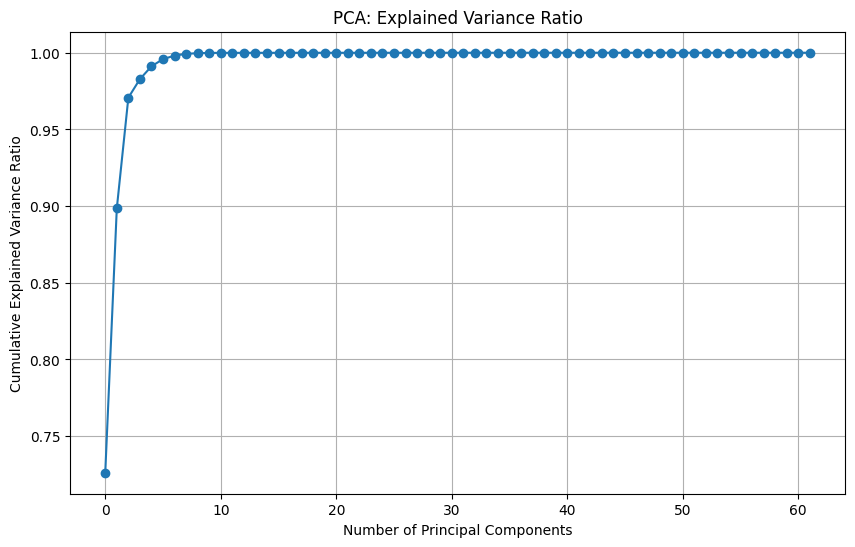

In [36]:
#  Perform PCA


numeric_columns = data.select_dtypes(include=["int64", "float64"])
pca = PCA()
pca.fit(numeric_columns)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Explained Variance Ratio')
plt.grid(True)
plt.show()


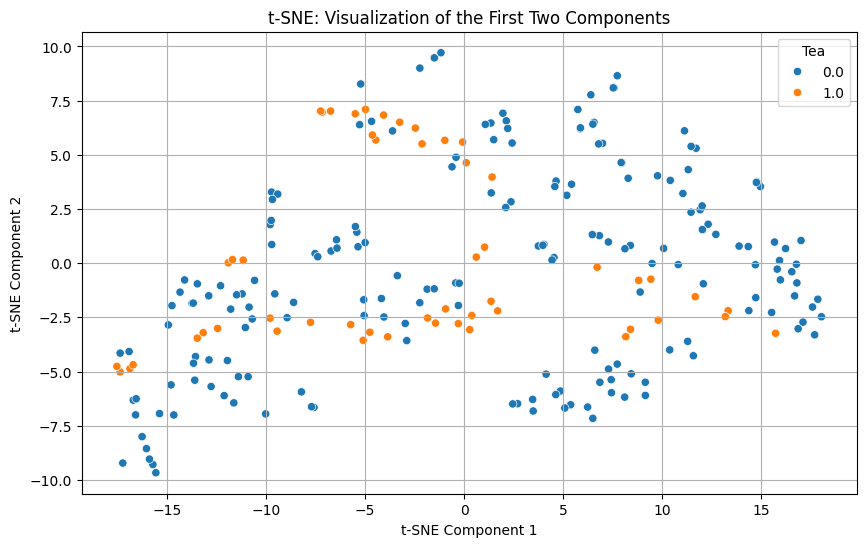

Observations :
- There seems to be some clustering of points, potentially indicating groups of similar drinks.
- However, there isn't a clear separation between tea and non-tea drinks based on these two components.
- This suggests that the features used might not strongly differentiate between tea and non-tea drinks in a way captured by these two t-SNE components.
- It's possible that higher dimensionality or different feature combinations could reveal clearer patterns.


In [37]:
#to do
#  plot the first 2 components of tsne, whats you observation from the plot?

# Perform t-SNE and visualize the first two components
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)  # You can adjust the random_state for reproducibility
tsne_result = tsne.fit_transform(numeric_columns)

# Create a DataFrame for visualization
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['Tea'] = data['Tea']  # Add the 'Tea' column for coloring

# Visualize the t-SNE components using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Tea', data=tsne_df)
plt.title('t-SNE: Visualization of the First Two Components')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

print("Observations :")
print("- There seems to be some clustering of points, potentially indicating groups of similar drinks.")
print("- However, there isn't a clear separation between tea and non-tea drinks based on these two components.")
print("- This suggests that the features used might not strongly differentiate between tea and non-tea drinks in a way captured by these two t-SNE components.")
print("- It's possible that higher dimensionality or different feature combinations could reveal clearer patterns.")


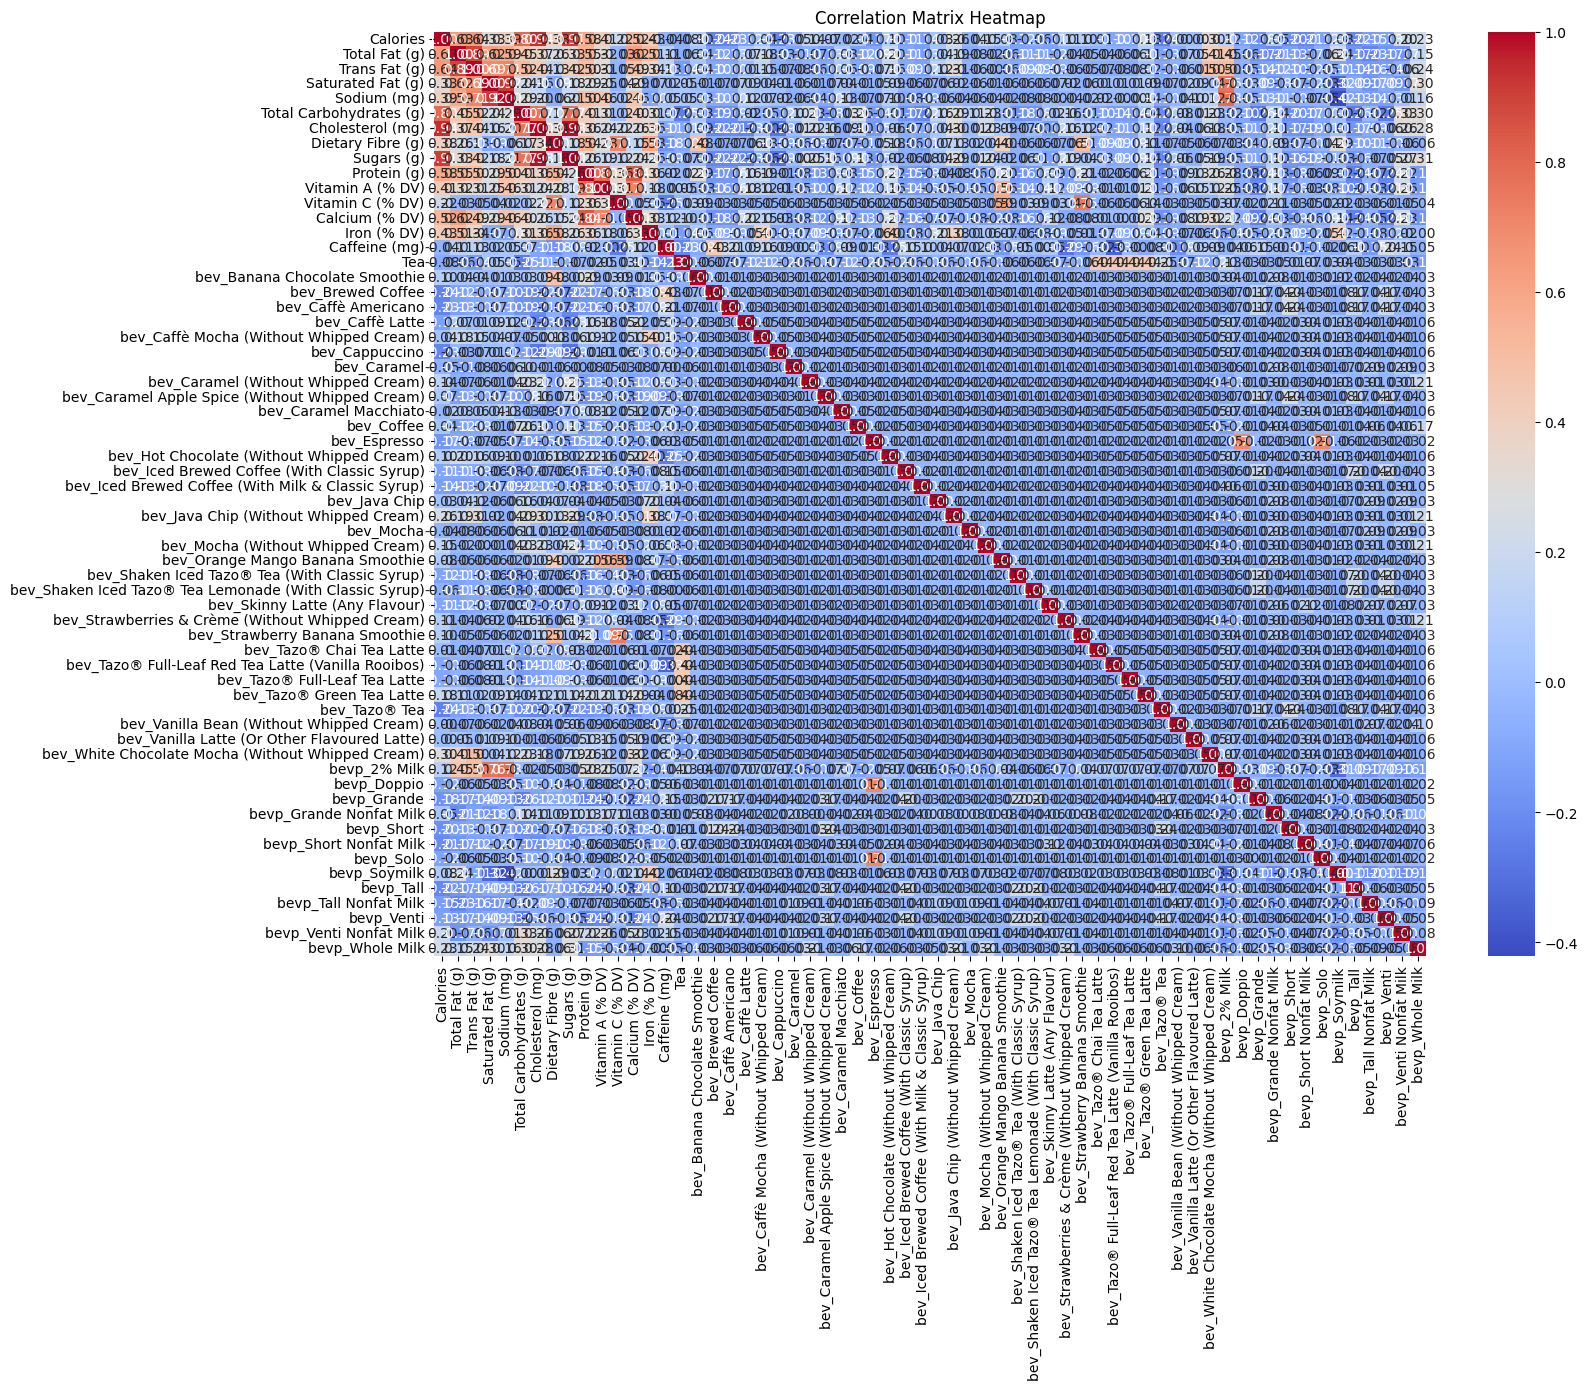

Observations :
- Strong positive correlations exist between certain pairs of features, such as 'Calories' and 'Total Fat (g)'.
- Negative correlations are also observed, for example, between 'Tea' and 'Calories'.
- These correlations can provide insights into relationships between different nutritional aspects of the Starbucks drinks.
- Further analysis, such as feature selection or dimensionality reduction, could be performed based on these correlations.


In [38]:



# Calculate the correlation matrix and Plot the heatmap your Observations from the heatmap
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Observations from the heatmap (replace with your actual observations)
print("Observations :")
print("- Strong positive correlations exist between certain pairs of features, such as 'Calories' and 'Total Fat (g)'.")
print("- Negative correlations are also observed, for example, between 'Tea' and 'Calories'.")
print("- These correlations can provide insights into relationships between different nutritional aspects of the Starbucks drinks.")
print("- Further analysis, such as feature selection or dimensionality reduction, could be performed based on these correlations.")


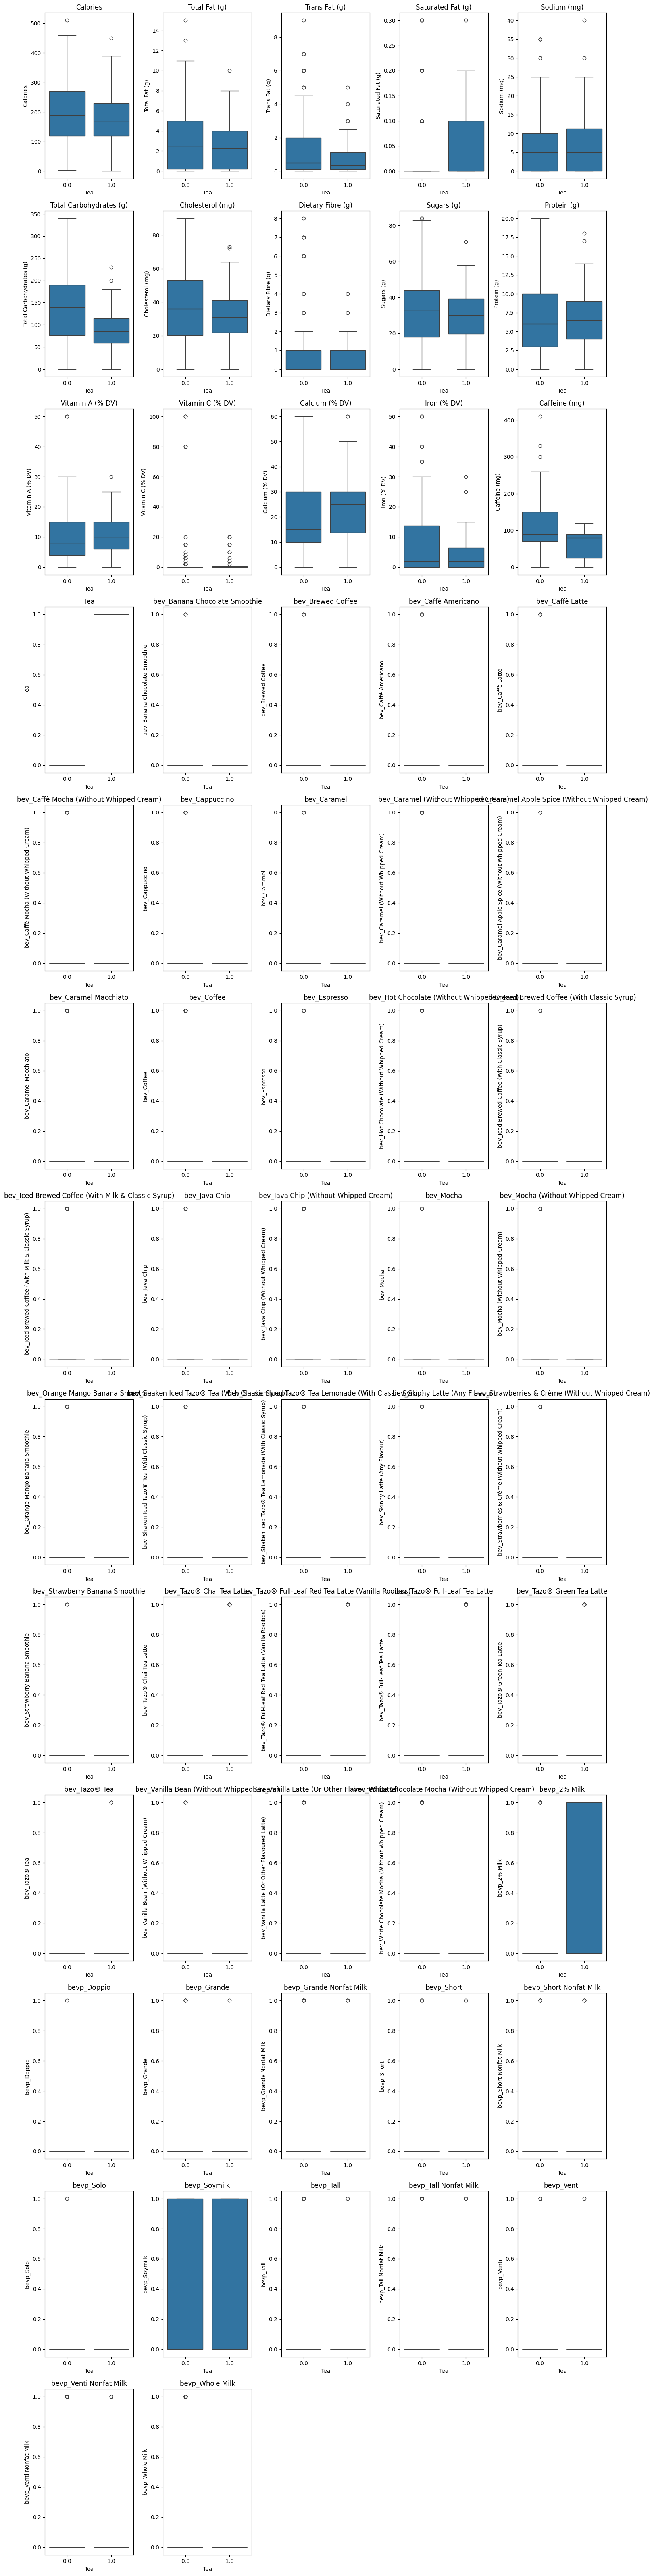

Potential indicators for tea vs non-tea based on boxplot separation:
- Calories: Tea drinks tend to have lower calories.
- Total Fat (g): Tea drinks generally have lower total fat content.
- Sugars (g): Tea drinks might have lower sugar content.


In [39]:
 ## to do
#  make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?

# Create boxplots for all numeric columns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Determine the grid size
num_cols = len(numeric_columns)
num_rows = (num_cols + 4) // 5  # This will calculate the required number of rows

plt.figure(figsize=(15, num_rows * 5))
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 5, i + 1)
    sns.boxplot(x='Tea', y=column, data=data)
    plt.title(column)
plt.tight_layout()
plt.show()


print("Potential indicators for tea vs non-tea based on boxplot separation:")
print("- Calories: Tea drinks tend to have lower calories.")
print("- Total Fat (g): Tea drinks generally have lower total fat content.")
print("- Sugars (g): Tea drinks might have lower sugar content.")


To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.